# COVID-19 Victim Exploration (Gender and age)

This is a covid-19 data exploration project that focus at virus impact on specific age and gender

In [2]:
# Import required module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load data
df_patient = pd.read_csv("COVID19_open_line_list.csv", index_col=0)

# Remove unnamed column
df_patient = df_patient.loc[:, ~df_patient.columns.str.contains('^Unnamed')]

# Remove empty row
df_patient = df_patient.dropna(how='all', axis='rows')

display(df_patient)

,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
ID,,,,,,,,,,,,,,,,,,,,,
1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,...,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13475.0,60-69,male,Nagoya City,Aichi Prefecture,Japan,1.0,NaN,NaN,NaN,27.02.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13476.0,40-49,female,NaN,Osaka,Japan,1.0,NaN,NaN,NaN,19.02.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13477.0,0-10,female,NaN,Osaka,Japan,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Describe data
df_patient.describe(include='all')

,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
count,1349,1264,10194,12906,13148,13170.0,13147.000000,13147.000000,13147,746,...,184,93,187,1024,1159,9068,12877,13079,13103,17
unique,116,5,806,150,51,NaN,NaN,NaN,7,64,...,12,38,47,186,280,302,148,46,661,1
top,50-59,male,Wenzhou City,Guangdong,China,NaN,NaN,NaN,admin2,22.01.2020,...,stable,26.02.2020,Could be some cases from 23rd,Yokohama Port,Wanzhou District,Wenzhou City,Guangdong,China,19,SL
freq,47,703,448,1228,10446,NaN,NaN,NaN,7960,43,...,78,8,91,479,65,448,1228,10446,575,17
mean,NaN,NaN,NaN,NaN,NaN,1.0,31.994650,110.495353,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.0,7.536335,27.985144,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.0,-37.813600,-124.953070,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.0,27.905380,111.729600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.0,31.759410,115.441800,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.0,35.781340,120.440400,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Look at metadata
df_patient.dtypes

age                          object
sex                          object
city                         object
province                     object
country                      object
wuhan(0)_not_wuhan(1)       float64
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_Wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary      float64
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3                       object
admin2                      

In [6]:
# Want to know number of na in each column
df_patient.isnull().sum()

age                         11825
sex                         11910
city                         2980
province                      268
country                        26
wuhan(0)_not_wuhan(1)           4
latitude                       27
longitude                      27
geo_resolution                 27
date_onset_symptoms         12428
date_admission_hospital     12444
date_confirmation              85
symptoms                    12681
lives_in_Wuhan              12609
travel_history_dates        12671
travel_history_location     12416
reported_market_exposure    13139
additional_information      10762
chronic_disease_binary      13156
chronic_disease             13161
source                        224
sequence_available          13173
outcome                     12990
date_death_or_discharge     13081
notes_for_discussion        12987
location                    12150
admin3                      12015
admin2                       4106
admin1                        297
country_new   

In [7]:
# Choose useful column, including age, sex, city, province, country, date_onset_symptoms, date_admission_hospital, date_confirmation, chronic_disease_binary, outcome, date_death_or_discharge
df_patient = df_patient[['age', 'sex', 'city', 'province', 'country', 'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'chronic_disease_binary', 'outcome', 'date_death_or_discharge']]

In [8]:
# Explore all column data frequency (uncomment one)
# df_patient['age'].value_counts().to_dict()
# df_patient['sex'].value_counts().to_dict()
# df_patient['city'].value_counts().to_dict()
# df_patient['province'].value_counts().to_dict()
# df_patient['country'].value_counts().to_dict()
df_patient['date_onset_symptoms'].value_counts().to_dict()
# df_patient['date_admission_hospital'].value_counts().to_dict()
# df_patient['date_confirmation'].value_counts().to_dict()
# df_patient['chronic_disease_binary'].value_counts().to_dict()
# df_patient['outcome'].value_counts().to_dict()
# df_patient['date_death_or_discharge'].value_counts().to_dict()

# sns.countplot(x='age',data=df_patient)
# sns.countplot(x='sex',data=df_patient)
# sns.countplot(x='city',data=df_patient)
# sns.countplot(x='province',data=df_patient)
# sns.countplot(x='country',data=df_patient)
# sns.countplot(x='date_onset_symptoms',data=df_patient)
# sns.countplot(x='date_admission_hospital',data=df_patient)
# sns.countplot(x='date_confirmation',data=df_patient)
# sns.countplot(x='chronic_disease_binary',data=df_patient)
# sns.countplot(x='outcome',data=df_patient)
# sns.countplot(x='date_death_or_discharge',data=df_patient)


{'22.01.2020': 43,
 '25.01.2020': 42,
 '24.01.2020': 41,
 '26.01.2020': 36,
 '30.01.2020': 36,
 '21.01.2020': 35,
 '28.01.2020': 34,
 '23.01.2020': 32,
 '19.01.2020': 28,
 '29.01.2020': 26,
 '27.01.2020': 24,
 '01.02.2020': 23,
 '31.01.2020': 21,
 '20.01.2020': 20,
 '18.01.2020': 20,
 '03.02.2020': 18,
 '07.02.2020': 13,
 '16.01.2020': 13,
 '16.02.2020': 12,
 '02.02.2020': 12,
 '06.02.2020': 11,
 '18.02.2020': 11,
 '20.02.2020': 10,
 '17.01.2020': 10,
 '17.02.2020': 10,
 '14.01.2020': 10,
 '12.02.2020': 10,
 '19.02.2020': 9,
 '24.02.2020': 9,
 '10.02.2020': 8,
 '22.02.2020': 8,
 '04.02.2020': 7,
 '10.01.2020': 7,
 '05.02.2020': 7,
 '08.02.2020': 6,
 '23.02.2020': 6,
 '25.02.2020': 6,
 '15.01.2020': 6,
 '14.02.2020': 5,
 '10.01.2020 - 22.01.2020': 5,
 '11.01.2020': 5,
 '13.02.2020': 5,
 '21.02.2020': 5,
 '09.02.2020': 5,
 '15.02.2020': 4,
 '26.02.2020': 4,
 '04.01.2020': 3,
 '03.01.2020': 3,
 '09.01.2020': 3,
 '11.02.2020': 3,
 '08.01.2020': 2,
 '13.01.2020': 2,
 'end of December 2019':

We do data cleaning with description below

1. Set `age` data in form of range value (ex: 20-29) as median value, long range value (ex: 38-68) as NA, and invalid value (e.g. string value) as NA
2. In `sex` column, rename Female to female and MALE to male, and set invalid value as NA
3. In `date_onset_symptoms` column, set '10.01.2020 - 22.01.2020', 'none', and 'end of December 2019' as NA and set '-25.02.2020' as '25.02.2020'. And convert it to datetime data type.
4. In `date_admission_hospital` column, set '18.01.2020 - 23.01.2020' as NA. And convert it to datetime data type.
5. In `date_confirmation` column, set '25.02.2020-26.02.2020' as NA. And convert it to datetime data type.
6. Simplify `outcome` value into four category i.e. stable, discharged, died, critical. Set other unknown category as NA
7. Set 'discharge' value as NA in `date_death_or_discharge` column
8. Add 'age_group' column

In [9]:
# Data cleaning
df_clean = df_patient.copy()

# 1
for data in df_clean['age'].unique().astype(str):
    if data.find('-') != -1:
        temp = data.split('-')
        if int(temp[1])-int(temp[0]) < 15:
            median = ( int(temp[1])+int(temp[0]) ) / 2
            df_clean.age = df_clean.age.replace({data:median})
        else:
            df_clean.age = df_clean.age.replace({data:np.nan})

df_clean.age = df_clean.age.replace({'Belgium':np.nan})
df_clean['age'] = df_clean['age'].astype(float)
print(df_clean['age'].unique())

# 2
df_clean.sex = df_clean.sex.replace(
    {'Female':'female',
    'Male':'male',
    '4000':np.nan})
print(df_clean['sex'].unique())

# 3
df_clean.date_onset_symptoms = df_clean.date_onset_symptoms.replace({
    '10.01.2020 - 22.01.2020':np.nan,
    'none':np.nan,
    'end of December 2019':np.nan,
    '-25.02.2020':'25.02.2020'
})
print(df_clean['date_onset_symptoms'].unique())

# 4
df_clean.date_admission_hospital = df_clean.date_admission_hospital.replace({
    '18.01.2020 - 23.01.2020':np.nan
})
print(df_clean['date_admission_hospital'].unique())

# 5
df_clean.date_confirmation = df_clean.date_confirmation.replace({
    '25.02.2020-26.02.2020':np.nan
})
print(df_clean['date_confirmation'].unique())

# 6
df_clean.outcome = df_clean.outcome.replace({
    'recovered':'discharged',
    'discharge':'discharged',
    'death':'died',
    'dead':'died',
    'Discharged':'discharged',
    '05.02.2020':np.nan,
    'critical condition, intubated as of 14.02.2020':'critical',
    'treated in an intensive care unit (14.02.2020)':'critical',
    'Symptoms only improved with cough. Currently hospitalized for follow-up.':np.nan,
    'severe':'critical'
})
print(df_clean['outcome'].unique())

# 7
df_clean.date_death_or_discharge = df_clean.date_death_or_discharge.replace({
    'discharge':np.nan
})
print(df_clean['date_death_or_discharge'].unique())

# 8
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)
print(df_clean['age_group'].unique())

[3.0000e+01 4.7000e+01 4.9000e+01 5.0000e+01        nan 4.2000e+01
 5.9000e+01 3.9000e+01 3.8000e+01 4.5000e+01 3.3000e+01 3.7000e+01
 3.2000e+01 1.8000e+01 5.6000e+01 4.4000e+01 6.5000e+01 2.1000e+01
 4.1000e+01 7.0000e+01 4.3000e+01 3.1000e+01 2.4000e+01 4.0000e+01
 6.6000e+01 3.6000e+01 1.0000e+01 6.3000e+01 7.8000e+01 7.6000e+01
 4.8000e+01 6.2000e+01 4.6000e+01 3.4000e+01 7.2000e+01 2.0000e+01
 5.4000e+01 2.0000e+00 2.9000e+01 6.1000e+01 5.1000e+01 8.0000e+01
 6.9000e+01 2.8000e+01 5.5000e+01 6.8000e+01 5.7000e+01 3.5000e+01
 2.7000e+01 5.2000e+01 2.2000e+01 2.3000e+01 8.8000e+01 1.9000e+01
 6.0000e+01 5.8000e+01 5.3000e+01 2.5000e+01 4.0500e+01 2.6000e+01
 6.4000e+01 3.4500e+01 1.1000e+01 5.4500e+01 7.3000e+01 7.4000e+01
 7.0000e+00 8.2000e+01 6.7000e+01 1.5000e+01 1.6000e+01 6.4500e+01
 4.4500e+01 8.4500e+01 3.3500e+01 5.0000e+00 3.0000e+00 4.0000e+00
 7.1000e+01 2.4500e+01 7.7000e+01 7.5000e+01 9.4000e+01 8.1000e+01
 5.8333e-01 1.7000e+01 8.0000e+00 9.0000e+00 8.3330e-02 1.2000

In [10]:
df_clean_age_sex = df_clean.dropna(subset=['age','sex','date_confirmation'], how='any')
df_clean_age_sex['date_confirmation'] = pd.to_datetime(df_clean_age_sex['date_confirmation'])
df_clean_age_sex.count()

age                        1171
sex                        1171
city                       1006
province                   1034
country                    1151
date_onset_symptoms         724
date_admission_hospital     697
date_confirmation          1171
chronic_disease_binary       17
outcome                     111
date_death_or_discharge      70
age_group                  1171
dtype: int64

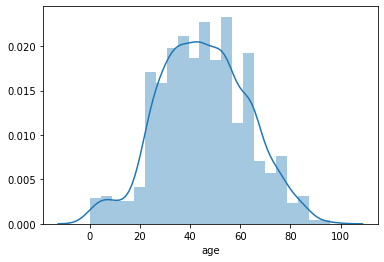

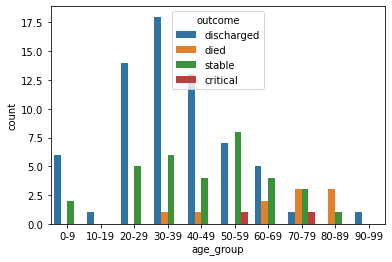

,age_group,all,died,discharged,mortality_rate
0,0-9,33,0,6,0.000000
1,10-19,27,0,1,0.000000
2,20-29,161,0,14,0.000000
3,30-39,234,1,18,0.004274
4,40-49,238,1,13,0.004202
5,50-59,213,0,7,0.000000
6,60-69,165,2,5,0.012121
7,70-79,70,3,1,0.042857
8,80-89,28,3,0,0.107143
9,90-99,2,0,1,0.000000


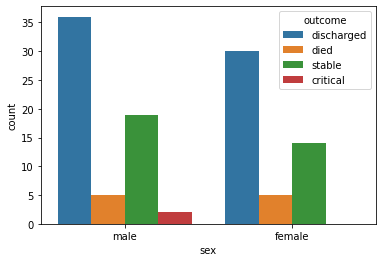

,sex,all,died,discharged,mortality_rate
0,female,503,5,30,0.009940
1,male,668,5,36,0.007485


In [16]:
# Age and sex distribution
sns.distplot(df_clean_age_sex['age'])
plt.show()

# Group by age
sns.countplot(x='age_group',hue='outcome',data=df_clean_age_sex)
plt.show()

all_age = df_clean_age_sex.groupby(['age_group']).size().reset_index(name='all')
died_age = df_clean_age_sex[df_clean_age_sex['outcome']=='died'].groupby(['age_group']).size().reset_index(name='died')
discharged_age = df_clean_age_sex[df_clean_age_sex['outcome']=='discharged'].groupby(['age_group']).size().reset_index(name='discharged')

mortality_age = all_age.merge(died_age)
mortality_age = mortality_age.merge(discharged_age)
mortality_age['mortality_rate'] = mortality_age['died']/mortality_age['all']
display(mortality_age)

# Group by sex
sns.countplot(x='sex',hue='outcome',data=df_clean_age_sex)
plt.show()

all_sex = df_clean_age_sex.groupby(['sex']).size().reset_index(name='all')
died_sex = df_clean_age_sex[df_clean_age_sex['outcome']=='died'].groupby(['sex']).size().reset_index(name='died')
discharged_sex = df_clean_age_sex[df_clean_age_sex['outcome']=='discharged'].groupby(['sex']).size().reset_index(name='discharged')

mortality_sex = all_sex.merge(died_sex)
mortality_sex = mortality_sex.merge(discharged_sex)
mortality_sex['mortality_rate'] = mortality_sex['died']/mortality_sex['all']
display(mortality_sex)

,date_confirmation,age_group,count,cum_sum,cum_perc
0,2020-01-02,10-19,1,1,0.085397
1,2020-01-02,20-29,5,5,0.426985
2,2020-01-02,30-39,13,13,1.110162
3,2020-01-02,40-49,16,16,1.366354
4,2020-01-02,50-59,9,9,0.768574
...,...,...,...,...,...
268,2020-12-02,20-29,2,161,13.748933
269,2020-12-02,30-39,1,234,19.982921
270,2020-12-02,40-49,1,238,20.324509
271,2020-12-02,50-59,3,213,18.189582


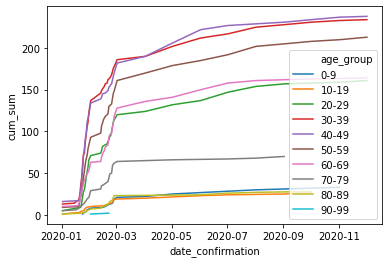

,date_confirmation,sex,count,cum_sum,cum_perc
0,2020-01-02,female,29,29,2.476516
1,2020-01-02,male,31,31,2.647310
2,2020-01-15,male,1,32,2.732707
3,2020-01-16,male,1,33,2.818104
4,2020-01-17,female,1,30,2.561913
...,...,...,...,...,...
78,2020-11-02,female,5,501,42.783945
79,2020-11-02,male,5,661,56.447481
80,2020-12-01,female,1,502,42.869342
81,2020-12-02,female,1,503,42.954740


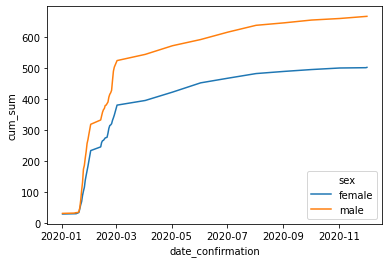

In [13]:
# Trend by age and gender
time_age = df_clean_age_sex.groupby(['date_confirmation','age_group']).size().reset_index(name='count')
time_age['cum_sum'] = time_age.groupby(['age_group'])['count'].cumsum()
time_age['cum_perc'] = 100*time_age['cum_sum']/time_age['count'].sum()
display(time_age)
sns.lineplot(x='date_confirmation',y='cum_sum',hue_order=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'],hue='age_group',data=time_age)
plt.show()

# sns.lineplot(x='date_confirmation',y='cum_perc',hue='age_group',data=time_age)
# plt.show()

time_sex = df_clean_age_sex.groupby(['date_confirmation','sex']).size().reset_index(name='count')
time_sex['cum_sum'] = time_sex.groupby(['sex'])['count'].cumsum()
time_sex['cum_perc'] = 100*time_sex['cum_sum']/time_sex['count'].sum()
display(time_sex)
sns.lineplot(x='date_confirmation',y='cum_sum',hue='sex',data=time_sex)
plt.show()
# sns.lineplot(x='date_confirmation',y='cum_perc',hue='sex',data=time_sex)
# plt.show()